Importar las librerías y archivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

excel_file = "C:/Users/iorla/Downloads/Datos-Practica-1.xlsx"
sheet_name = "Hoja1"

Valores del fondo

In [2]:
data = pd.read_excel(excel_file, sheet_name=sheet_name)
start_row = 2  # Fila inicial
end_row = 6  # Fila final
start_col = 2  # Columna "B"
fondo = data.iloc[start_row-1:end_row, start_col-1]
print(fondo)

1    24
2    21
3    30
4    17
5    24
Name: Unnamed: 1, dtype: object


Estadísticos del fondo

In [3]:
desvEst_Fondo = fondo.std()
print(f"Desviación estándar del fondo: {desvEst_Fondo}")

Desviación estándar del fondo: 4.764451699828638


Leer y describir el conjunto de lecturas del Pb-210

In [4]:
data = pd.read_excel(excel_file, sheet_name=sheet_name)
start_row = 2  # Fila inicial
end_row = 160  # Fila final
start_col = 5  # Columna "E"
fuentePb = data.iloc[start_row-1:end_row, start_col-1]
print(fuentePb)

1      866
2      837
3      816
4      820
5      862
      ... 
154    832
155    820
156    829
157    803
158    923
Name: Unnamed: 4, Length: 158, dtype: object


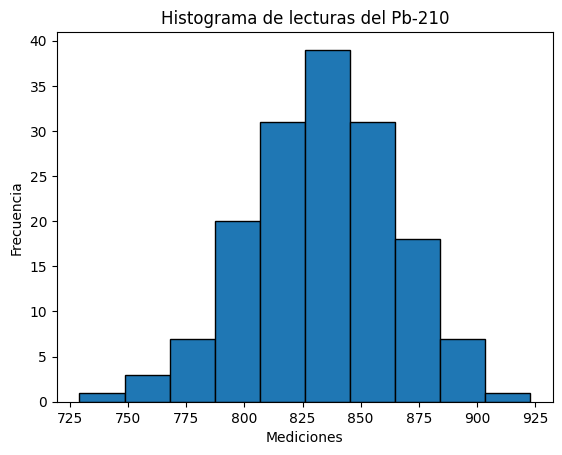

In [5]:
plt.hist(fuentePb, bins=10, edgecolor='black')  
plt.title('Histograma de lecturas del Pb-210')
plt.xlabel('Mediciones')
plt.ylabel('Frecuencia')
plt.show()


Valores estadísticos de las lecturas de Pb-210

In [6]:
media = np.rint(fuentePb.mean())
varianza = np.rint(fuentePb.var())
desvEst = np.rint(fuentePb.std())

print(f"La media es: {media:.2f}")
print(f"La varianza es: {varianza:.2f}")
print(f"La desviación estándar es: {desvEst:.2f}")

La media es: 833.00
La varianza es: 1014.00
La desviación estándar es: 32.00


Comparación de la desv. est. con raíz cuadrada de media

In [7]:
print(f"La raíz cuadrada de la media es: {np.sqrt(media):.2f}")
print(f"La diferencia entre la media y la desv. estándar es de : {np.sqrt(media)-desvEst:.2f}")

La raíz cuadrada de la media es: 28.86
La diferencia entre la media y la desv. estándar es de : -3.14


Porcentaje de datos en el histograma

In [8]:
for n in range(1,4):
    # Para 3 desviación estándar
    li1std = media - desvEst * n
    ls1std = media + desvEst * n

    # Datos están dentro del rango
    datosDentroDeSTD = sum((li1std <= x <= ls1std) for x in fuentePb)
    porcentaje_STD = (datosDentroDeSTD / len(fuentePb)) * 100
    print(f"Porcentaje de datos dentro del rango para {n} desviación estándar: {porcentaje_STD:.2f} %")


Porcentaje de datos dentro del rango para 1 desviación estándar: 68.99 %
Porcentaje de datos dentro del rango para 2 desviación estándar: 96.20 %
Porcentaje de datos dentro del rango para 3 desviación estándar: 99.37 %


Lecturas de fuente activada (Plata)

In [9]:
data = pd.read_excel(excel_file, sheet_name=sheet_name)
start_row = 2  # Fila inicial
end_row = 107  # Fila final
start_col = 8  # Columna "H"
fuenteAg = data.iloc[start_row-1:end_row, start_col-1]
print(fuenteAg)

1      972
2      755
3      628
4      497
5      444
      ... 
102      3
103      8
104      4
105      5
106      5
Name: Unnamed: 7, Length: 106, dtype: object


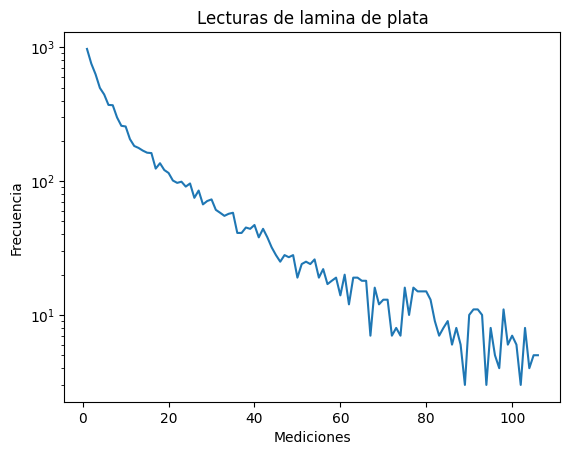

In [11]:
plt.semilogy(fuenteAg)  
plt.title('Lecturas de lamina de plata')
plt.xlabel('Mediciones')
plt.ylabel('Frecuencia')
plt.show()

Fondo a 10 segundos

In [12]:
# Las cuentas por segundo del fondo (cps)
cps_fondo = [i/60 for i in fondo]
for i,x in enumerate(cps_fondo,1):
    print(f"La medición {i} tiene {x} cps.")

La medición 1 tiene 0.4 cps.
La medición 2 tiene 0.35 cps.
La medición 3 tiene 0.5 cps.
La medición 4 tiene 0.2833333333333333 cps.
La medición 5 tiene 0.4 cps.


In [14]:
# El fondo a 10 segundos
fondo_10s = np.rint(np.mean(cps_fondo)*10)
incertidumbre_fondo_10s = np.rint(np.std(cps_fondo)*10)
print(f"El fondo a 10 segundos es de: {fondo_10s:.2f} ± {incertidumbre_fondo_10s:.2f} cps")

El fondo a 10 segundos es de: 4.00 ± 1.00 cps


Lecturas netas de la laminilla 

In [15]:
lectura_neta_Ag = [(i-fondo_10s) for i in fuenteAg]
for x in lectura_neta_Ag:
    print(f"{x:.2f}")

968.00
751.00
624.00
493.00
440.00
367.00
365.00
295.00
255.00
252.00
202.00
179.00
173.00
165.00
159.00
158.00
120.00
132.00
117.00
111.00
97.00
93.00
95.00
87.00
92.00
71.00
81.00
63.00
67.00
69.00
57.00
54.00
51.00
53.00
54.00
37.00
37.00
41.00
40.00
43.00
34.00
40.00
34.00
28.00
24.00
21.00
24.00
23.00
24.00
15.00
20.00
21.00
20.00
22.00
15.00
18.00
13.00
14.00
15.00
10.00
16.00
8.00
15.00
15.00
14.00
14.00
3.00
12.00
8.00
9.00
9.00
3.00
4.00
3.00
12.00
6.00
12.00
11.00
11.00
11.00
9.00
5.00
3.00
4.00
5.00
2.00
4.00
2.00
-1.00
6.00
7.00
7.00
6.00
-1.00
4.00
1.00
0.00
7.00
2.00
3.00
2.00
-1.00
4.00
0.00
1.00
1.00


Gráfica de las lecturas netas

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050]


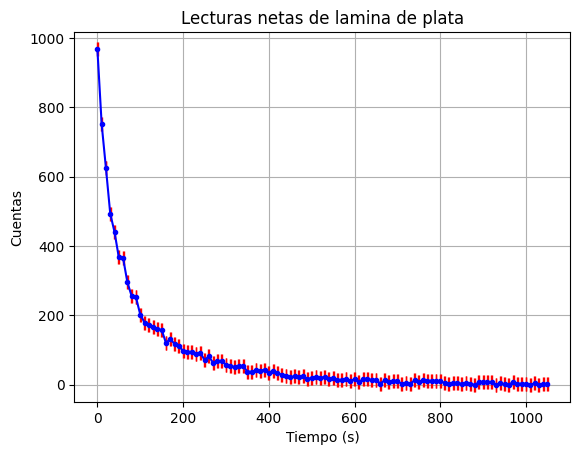

In [16]:
segundosTotales = [i*10 for i in range(0,len(fuenteAg))]
print(segundosTotales)
plt.errorbar(segundosTotales ,lectura_neta_Ag, xerr = incertidumbre_fondo_10s, fmt='o-', markersize=3, color='blue', ecolor='red', elinewidth=1, capsize=5)  
plt.title('Lecturas netas de lamina de plata')
plt.xlabel('Tiempo (s)')
plt.ylabel('Cuentas')
plt.grid(True)
plt.show()

In [28]:
logLecturaNeta_Ag = np.log(lectura_neta_Ag)
datosLecturasNetasAg = pd.DataFrame({"Segundos":segundosTotales, "Log Lecturas":logLecturaNeta_Ag})
datosLecturasNetasAg = datosLecturasNetasAg.replace([np.inf, -np.inf], np.nan)
datosLecturasNetasAg = datosLecturasNetasAg.dropna()

C:\Users\iorla\AppData\Local\Temp\ipykernel_27008\322336889.py:1: RuntimeWarning: divide by zero encountered in log
  logLecturaNeta_Ag = np.log(lectura_neta_Ag)
C:\Users\iorla\AppData\Local\Temp\ipykernel_27008\322336889.py:1: RuntimeWarning: invalid value encountered in log
  logLecturaNeta_Ag = np.log(lectura_neta_Ag)


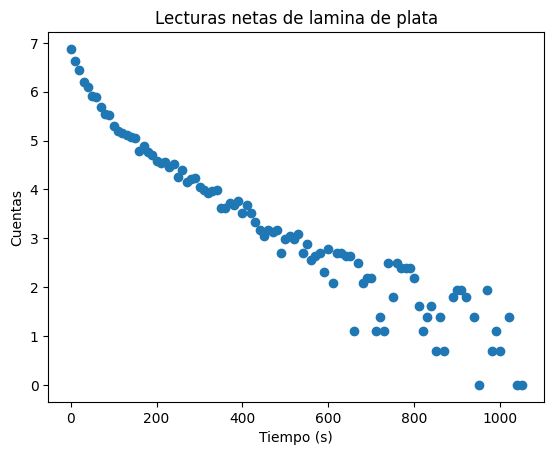

In [29]:
# Graficando en semilog
plt.scatter(segundosTotales,logLecturaNeta_Ag ) 
plt.title('Lecturas netas de lamina de plata')
plt.xlabel('Tiempo (s)')
plt.ylabel('Cuentas')
plt.show()

In [30]:
print(datosLecturasNetasAg)

     Segundos  Log Lecturas
0           0      6.875232
1          10      6.621406
2          20      6.436150
3          30      6.200509
4          40      6.086775
..        ...           ...
99        990      1.098612
100      1000      0.693147
102      1020      1.386294
104      1040      0.000000
105      1050      0.000000

[101 rows x 2 columns]


In [74]:
x = datosLecturasNetasAg['Segundos']
y = datosLecturasNetasAg['Log Lecturas']

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Imprimir los resultados del ajuste
print("Pendiente:", slope)
print("Intercepto:", intercept)
print("Coeficiente de correlación (r):", r_value)
print("Valor p:", p_value)
print("Error estándar:", std_err)


Pendiente: -0.005193757084750867
Intercepto: 5.801875921401857
Coeficiente de correlación (r): -0.9621431858130458
Valor p: 1.0659634717750325e-57
Error estándar: 0.00014786374713279867


In [75]:
linea_regresion = slope * x + intercept
numerador = y - linea_regresion
errorModelo = np.sqrt(sum(np.power(numerador,2)/103))
errorModelo

0.43265081097546115

In [76]:
errorPendiente = errorModelo*np.sqrt(105/(105*sum(x**2)-np.power(sum(x),2)))
errorPendiente

6.071025667863498e-05

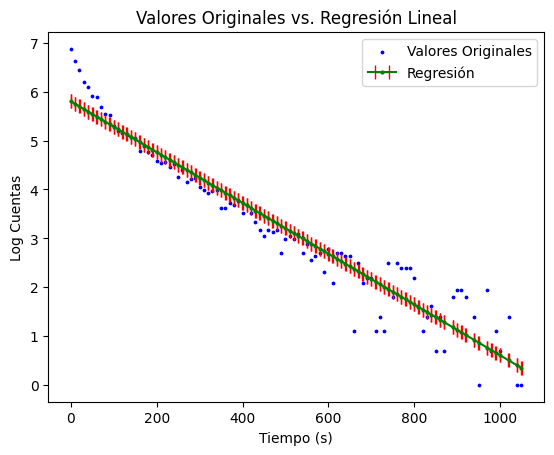

In [83]:
# Línea de regresión lineal
linea_regresion = slope * x + intercept
plt.scatter(x, y, label='Valores Originales', color='blue' , s=3)
#plt.plot(x, linea_regresion, label='Regresión Lineal', color='red')
plt.errorbar(x ,linea_regresion, xerr = errorModelo, fmt='o-', markersize=2, color='green', ecolor='red', elinewidth=1, capsize=5, label="Regresión")
plt.title('Valores Originales vs. Regresión Lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Log Cuentas')
plt.legend()
plt.show()

In [72]:
slope = abs(slope)
tMedioInf = np.log(2)/(slope-errorPendiente)
tMedio = np.log(2)/slope
tMedioSup = np.log(2)/(slope+errorPendiente)
enMinutos = tMedio/60
# enHoras = tMedio/3600
# enDias = enHoras/24
# enAnios = enDias/356
print(f"Constante de decaimiento: {slope:0.4f} ± {errorPendiente:0.4f} 1/s")
print(f"T medio inferior: {tMedioInf:0.2f} s ---------- en minutos {tMedioInf/60:0.2f}")
print(f"T medio: {tMedio:0.2f} s --------- en minutos {enMinutos:0.2f}")
print(f"T medio superior: {tMedioSup:0.2f} s -------------- en minutos {tMedioSup/60:0.2f}")
# print(f"En segundos: {tMedio:0.2f}")
print(f"En minutos: {enMinutos:0.2f} min") # Ag-100 o Ag-100m o Ag-108
# print(f"En horas: {enHoras}")
# print(f"En dias: {enDias}")
# print(f"En años: {enAnios}")

Constante de decaimiento: 0.0052 ± 0.0001 1/s
T medio inferior: 135.04 s ---------- en minutos 2.25
T medio: 133.46 s --------- en minutos 2.22
T medio superior: 131.92 s -------------- en minutos 2.20
En minutos: 2.22 min


El elemento es Ag-100m